In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
import seaborn as sns
import prince
%matplotlib inline

In [2]:
df=pd.read_excel('./../myproj/Survey_final_1.xlsx')

In [4]:
X=df[['What is your gender?',
       'During the lockdown have you been doing more household work?',
       'Have you or anyone you know have corona virus/recovered from COVID/been tested for COVID?',
       'How often do you use masks/hand sanitizers(per day)?',
       'Do you feel like you have wasted your time during the lock down or have you ever felt pressurized by your peer’s accomplishments during the lock down?',
       'Are you in a containment zone?',
       'Do you have children less than 3 yrs, or elders 65+ at your house?',
       'Have you ever felt afraid or anxious to go to hospital during this pandemic?',
       'Has your sleep cycle changed drastically?',
       'Have you felt frustrated by having your activities, major life events or opportunities affected by the virus?',
       'Do you have online classes/assignments/assessments/tests?',
       'Have you taken any medication to prevent corona(Chloroquine or kabasura kudineer) or any medication to increase your immunity?',
       'Have you been affected by not being able to visit religious places?']]

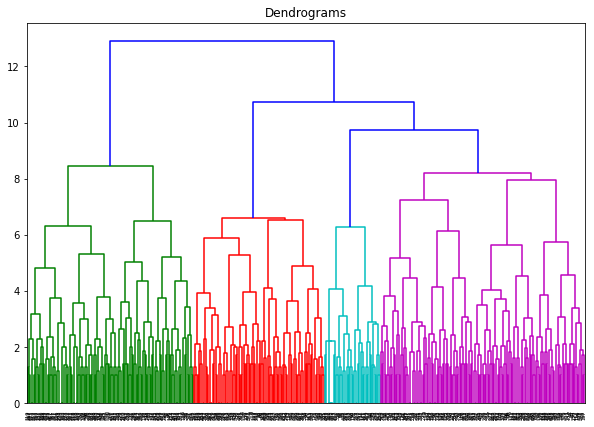

In [5]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))

In [6]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
y_est=cluster.fit_predict(X)

In [7]:
y_est

array([0, 1, 1, 2, 2, 1, 0, 1, 2, 1, 1, 0, 0, 3, 2, 1, 2, 3, 1, 0, 1, 0,
       0, 3, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 3, 3, 1, 2, 2, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 2, 1, 1, 1, 2, 2, 1, 3, 0, 0, 1, 2,
       3, 2, 2, 2, 3, 1, 1, 2, 1, 2, 2, 2, 2, 1, 0, 1, 1, 1, 1, 2, 0, 2,
       3, 2, 1, 0, 1, 0, 3, 0, 1, 2, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 2, 1,
       0, 0, 1, 2, 0, 0, 1, 2, 0, 0, 1, 3, 1, 1, 1, 3, 1, 2, 0, 2, 1, 2,
       0, 2, 0, 3, 1, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 0, 0, 1, 3, 1, 0, 0,
       0, 0, 3, 3, 0, 0, 2, 0, 0, 0, 0, 1, 1, 1, 1, 3, 0, 1, 3, 2, 1, 2,
       3, 1, 1, 1, 0, 3, 1, 0, 1, 1, 0, 1, 0, 2, 1, 1, 1, 0, 1, 0, 2, 1,
       1, 1, 2, 1, 1, 0, 2, 3, 0, 1, 1, 2, 0, 1, 1, 2, 1, 2, 2, 3, 0, 2,
       0, 3, 1, 0, 2, 1, 0, 2, 2, 1, 1, 0, 0, 2, 1, 1, 3, 3, 1, 2, 1, 0,
       1, 2, 0, 1, 2, 0, 0, 0, 1, 1, 0, 0, 3, 2, 1, 0, 3, 2, 0, 0, 0, 1,
       1, 1, 0, 0, 2, 0, 1, 1, 2, 0, 0, 1, 1, 0, 0, 0, 2, 2, 1, 2, 2, 0,
       1, 1, 2, 0, 0, 3, 1, 1, 2, 0, 0, 0, 1, 2, 1,

In [9]:
y=df['Anxiety Level']

In [10]:
y_new=[1 if x==0 else 3 if x==1 else 2 if x==2 else 0 for x in y]

In [11]:
y_new=[0 for x in y_new if x==0 or x==1]

In [12]:
y_new

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_new, y_est)

ValueError: Found input variables with inconsistent numbers of samples: [59, 439]

In [14]:
y_new=[1 if x==1 or x==2 or x==3 else 0 for x in y]

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_new, y_est)

0.39635535307517084

In [7]:
X['Cluster']=y_est

<ipython-input-7-e8a2972f3a0a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster']=y_est


In [9]:
X.columns

Index(['What is your gender?',
       'During the lockdown have you been doing more household work?',
       'Have you or anyone you know have corona virus/recovered from COVID/been tested for COVID? ',
       'How often do you use masks/hand sanitizers(per day)?',
       'Do you feel like you have wasted your time during the lock down or have you ever felt pressurized by your peer’s accomplishments during the lock down?',
       'Are you in a containment zone? ',
       'Do you have children less than 3 yrs, or elders 65+ at your house?',
       'Have you ever felt afraid or anxious to go to hospital during this pandemic?',
       'Has your sleep cycle changed drastically?',
       'Have you felt frustrated by having your activities, major life events or opportunities affected by the virus? ',
       'Do you have online classes/assignments/assessments/tests? ',
       'Have you taken any medication to prevent corona(Chloroquine or kabasura kudineer) or any medication to increase your 

In [3]:
df.columns

Index(['Timestamp', 'Which age group you belong to?',
       'Location(From which state you are?)',
       'Is it difficult to get essentials(food/medicine)?',
       'What is your gender?', 'How you ever felt symptoms of COVID?',
       'Do you have any of the following conditions?',
       'During the lockdown have you been doing more household work?',
       'Have you or anyone you know have corona virus/recovered from COVID/been tested for COVID?',
       'How often do you use masks/hand sanitizers(per day)?',
       'Do you feel like you have wasted your time during the lock down or have you ever felt pressurized by your peer’s accomplishments during the lock down?',
       'How often do you eat outside food? (per week)',
       'Are you in a containment zone?',
       'Are you stuck somewhere alone without support from friends or family?',
       'Do you have children less than 3 yrs, or elders 65+ at your house?',
       'Have you ever felt afraid or anxious to go to hospital du

In [4]:
X=df[['Is it difficult to get essentials(food/medicine)?',
       'What is your gender?', 'How you ever felt symptoms of COVID?',
       'Do you have any of the following conditions?',
       'During the lockdown have you been doing more household work?',
       'Have you or anyone you know have corona virus/recovered from COVID/been tested for COVID?',
       'How often do you use masks/hand sanitizers(per day)?',
       'Do you feel like you have wasted your time during the lock down or have you ever felt pressurized by your peer’s accomplishments during the lock down?',
       'How often do you eat outside food? (per week)',
       'Are you in a containment zone?',
       'Are you stuck somewhere alone without support from friends or family?',
       'Do you have children less than 3 yrs, or elders 65+ at your house?',
       'Have you ever felt afraid or anxious to go to hospital during this pandemic?',
       'Has your sleep cycle changed drastically?',
       'Have you felt frustrated by having your activities, major life events or opportunities affected by the virus?',
       'Is someone from your family in the medical field everyday?',
       'Do you have online classes/assignments/assessments/tests?',
       'Did you face a pay cut/job loss/take another job to cover expenses?',
       'How often do you leave your house?(per week)',
       'How often do you interact with people outside your house(friends,neighbors etc.,)?',
       'Have you taken any medication to prevent corona(Chloroquine or kabasura kudineer) or any medication to increase your immunity?',
       'Have you been affected by not being able to visit religious places?',
       'Do you miss hanging out with people outside of your house?']]

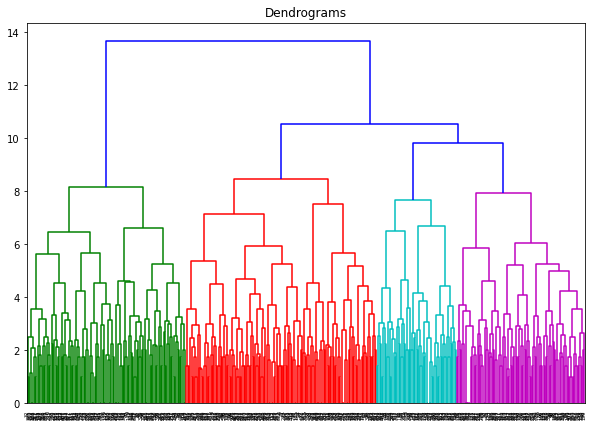

In [5]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))

In [6]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
y_est=cluster.fit_predict(X)

In [7]:
y_est

array([1, 0, 0, 3, 0, 2, 1, 0, 0, 1, 0, 0, 3, 3, 0, 1, 0, 1, 2, 1, 2, 1,
       3, 0, 0, 0, 2, 0, 3, 0, 2, 3, 1, 3, 2, 3, 3, 0, 3, 3, 2, 1, 0, 1,
       1, 3, 2, 1, 2, 3, 1, 1, 0, 2, 1, 0, 2, 2, 0, 0, 3, 2, 1, 1, 1, 0,
       2, 0, 1, 1, 3, 0, 1, 0, 1, 0, 0, 2, 0, 2, 1, 1, 2, 1, 2, 0, 2, 1,
       2, 0, 2, 0, 0, 1, 0, 3, 2, 1, 1, 0, 1, 2, 3, 2, 0, 3, 2, 1, 1, 2,
       1, 1, 0, 0, 2, 0, 2, 0, 1, 0, 2, 2, 1, 2, 3, 2, 2, 0, 1, 0, 2, 2,
       1, 3, 2, 2, 2, 2, 1, 3, 2, 0, 1, 1, 0, 1, 0, 1, 3, 3, 3, 2, 1, 3,
       2, 1, 2, 2, 1, 1, 0, 1, 2, 0, 1, 0, 0, 1, 0, 0, 1, 2, 3, 0, 0, 0,
       3, 2, 2, 0, 1, 3, 1, 1, 1, 1, 1, 0, 1, 0, 0, 3, 3, 1, 1, 1, 0, 0,
       2, 2, 0, 2, 3, 1, 0, 3, 1, 2, 0, 0, 1, 1, 2, 2, 2, 0, 0, 3, 1, 2,
       1, 2, 0, 1, 0, 2, 1, 2, 0, 0, 0, 1, 3, 0, 1, 0, 2, 2, 3, 0, 2, 0,
       0, 3, 1, 3, 0, 3, 1, 1, 2, 1, 1, 0, 2, 0, 2, 1, 2, 0, 1, 1, 0, 1,
       1, 1, 1, 3, 3, 1, 2, 0, 0, 3, 1, 0, 2, 2, 1, 1, 0, 0, 0, 2, 0, 1,
       2, 0, 0, 1, 1, 2, 1, 0, 0, 1, 0, 0, 0, 0, 2,

In [8]:
y_est.shape

(439,)

In [3]:
display_parallel_coordinates(X_clustered, 5)

NameError: name 'display_parallel_coordinates' is not defined